In [2]:
#Simulator
#IMODE 4
#ask good questions draw bigger circles: research

In [3]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [24]:
dfref=pd.read_excel('smooth_interp.xlsx',header=0,index_col=0)
dfref.head()
dfref=dfref.drop('minute',axis=1)
dfref.columns=(['F', 'FW', 'MS', 'PS', 'SW','BP', 'P', 'SL', 'D', 'CP', 'D50'])

In [5]:
df3=pd.read_excel('CC_185802-229370.xlsx',header=0,index_col=0)
df3.columns = [ 'F', 'FW', 'P', 'MS', 'BP1_only','SW','SL','D','PS','CP','BP','D50'] ### *** change depend on data set

df=df3.iloc[120:] #.copy()

In [6]:
#p = {'a':A,'b':B,'c':C}
import pickle
with open('p_gek_3er.pkl', 'rb') as file:           
    P1 = pickle.load(file)

In [7]:
with open('p_hm_1.pkl', 'rb') as file:
    p2 = pickle.load(file)
    #arw

In [ ]:
# df=pd.DataFrame(arw.T)
# df.columns=(['F', 'FW', 'MS', 'SW', 'PS'])
# df.head()

In [8]:
#Attempt for loop simulation 1
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

MV = ['F', 'FW', 'MS', 'SW', 'PS']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 6 # Number of outputs
nu = 5 # Number of inputs


# A (na x ny)
# B (ny x (nb x nu))
# C (ny)
#p is above

# Create GEKKO model
m = GEKKO(remote=False)

# Build GEKKO ARX model

y = m.Array(m.CV,6)
u = m.Array(m.MV,5)

for i in range(len(y)):
    y[i].value=df[CV[i]].iloc[0]

#y[3].value=0.0 D

y,u = m.arx(P1,y,u)

# # rename CVs
# TC1 = y[0]
# TC2 = y[1]

# # rename MVs
# Q1 = u[0]
# Q2 = u[1]


# load inputs
tf = 20 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()
u4 = u3.copy()
u5 = u4.copy()

# u1[:] = df_5[MV[0]].median()
# u2[:] = df_5[MV[1]].median()
# u3[:] = df_5[MV[2]].median()
# u4[:] = df_5[MV[3]].median()
# u5[:] = df_5[MV[4]].median()

u1[0:] = df[MV[0]].iloc[0:tf+1]
u2[0:] = df[MV[1]].iloc[0:tf+1]
u3[0:] = df[MV[2]].iloc[0:tf+1]
u4[0:] = df[MV[3]].iloc[0:tf+1]
u5[0:] = df[MV[4]].iloc[0:tf+1]

u[0].value = u1
u[1].value = u2
u[2].value = u3
u[3].value = u4
u[4].value = u5

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]; mv4 = u[3]; mv5 = u[4]
cv1 = y[0]; cv2 = y[1]; cv3 = y[2]; cv4 = y[3]; cv5 = y[4]; cv6 = y[5]


# options
nt=11
tm = np.linspace(0,10,nt)
m.options.IMODE=4

p1 = np.ones_like(tm)
p2 = np.ones_like(tm)
p3 = np.ones_like(tm)
p4 = np.ones_like(tm)
p5 = np.ones_like(tm)
p6 = np.ones_like(tm)
for p in [p1,p2,p3,p4,p5,p6]:
    p[0]=df[CV[i]].iloc[0]
#import time

m.time = [tm[0],tm[1]]

for i in range(1,nt):

    m.solve(disp=False)
    
    p1[i]=m.y[0].value[1]
    p2[i]=m.y[1].value[1]
    p3[i]=m.y[2].value[1]
    p4[i]=m.y[3].value[1]
    p5[i]=m.y[4].value[1]    
    p6[i]=m.y[5].value[1]
    
# simulate
#m.solve(disp=False)


#m.time=m.time[20:]
plt.figure(0,figsize=(12,4))
plt.subplot(5,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$F$');plt.legend(loc='best')
plt.subplot(5,1,2)
plt.plot(m.time,mv2.value,'b--',label=r'$FW$');plt.legend(loc='best')
plt.subplot(5,1,3)
plt.plot(m.time,mv3.value,'y--',label=r'$MS$');plt.legend(loc='best')
plt.subplot(5,1,4)
plt.plot(m.time,mv4.value,'g--',label=r'$SW$');plt.legend(loc='best')
plt.subplot(5,1,5)
plt.plot(m.time,mv5.value,'m--',label=r'$PS$');plt.legend(loc='best')
plt.ylabel('MV')
plt.legend(loc='best')
plt.figure(1,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,cv1.value,'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,cv2.value,'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,cv3.value,'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,cv4.value,'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,cv5.value,'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,cv6.value,'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');
plt.legend(loc='best')
plt.show();
plt.figure(2,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(m.time,df[CV[0]].iloc[:tf+1],'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(m.time,df[CV[1]].iloc[:tf+1],'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(m.time,df[CV[2]].iloc[:tf+1],'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(m.time,df[CV[3]].iloc[:tf+1],'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(m.time,df[CV[4]].iloc[:tf+1],'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(m.time,df[CV[5]].iloc[:tf+1],'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');

Exception: Data arrays must have the same length, and match time discretization in dynamic problems

In [68]:
# exxample
#%load http://apmonitor.com/wiki/index.php/Main/Simulation?action=sourceblock&num=1
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# Number of timesteps
nt = 11
tm = np.linspace(0, 1, nt)

# Initialize GEKKO

p3 = GEKKO()

# define model
for p in [p1,p2,p3]:
    if p==p3:
        p.time = [tm[0],tm[1]]
        
    # State Variables
    p.theta = p.Var(value=0, name='angle')
    p.dtheta_dt = p.Var(value=2.5, name='angular velocity')

    # Equations
    p.Equation(p.theta.dt() == p.dtheta_dt)
    p.Equation(p.dtheta_dt.dt() == \
               -p.g/p.l*p.sin(p.theta) - p.f/p.m*p.dtheta_dt)
    p.options.NODES=5

# Solve simultaneously
p1.options.IMODE=4
p1.solve(disp=False)

p3.options.IMODE=4
th = np.ones_like(tm)
dth = np.ones_like(tm)
th[0] = 0
dth[0] = 2.5
import time
for i in range(1,nt):
    p3.solve(disp=False)

    # record values for plotting
    th[i] = p3.theta.value[1]
    dth[i] = p3.dtheta_dt.value[1]

# Plot results
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8,7))

axes[0].plot(tm, p1.theta.value, 'o-',color='red')
axes[0].plot(tm, p2.theta.value, ':',color='green')
axes[0].plot(tm, th, '--',color='black')
axes[0].set_title("theta")
axes[0].set_ylabel('radians')
axes[0].grid()

axes[1].plot(tm, p1.dtheta_dt.value, 'o-',color='red')
axes[1].plot(tm, p2.dtheta_dt.value, ':',color='green')
axes[1].plot(tm, dth, '--',color='black')
axes[1].set_title("dtheta_dt")
axes[1].set_ylabel('radians/sec')
axes[1].grid()
axes[1].set_xlabel('Time (seconds)')

plt.show()

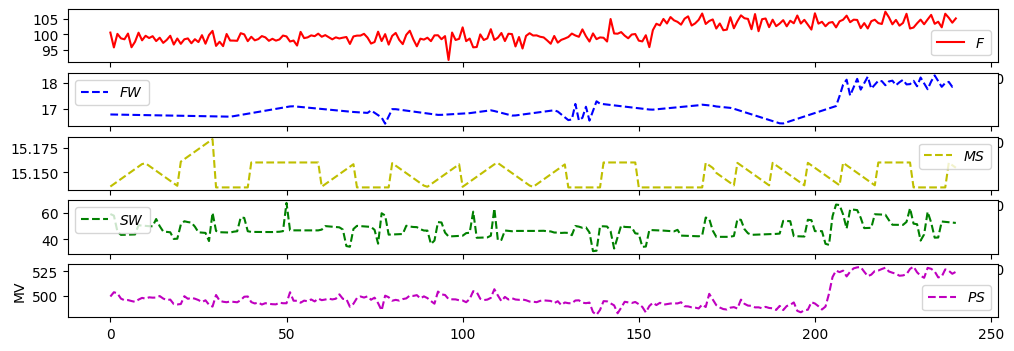

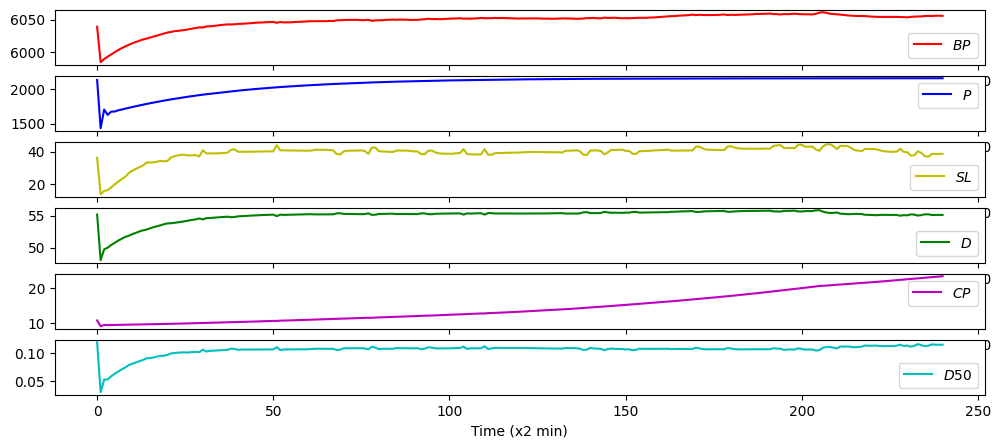

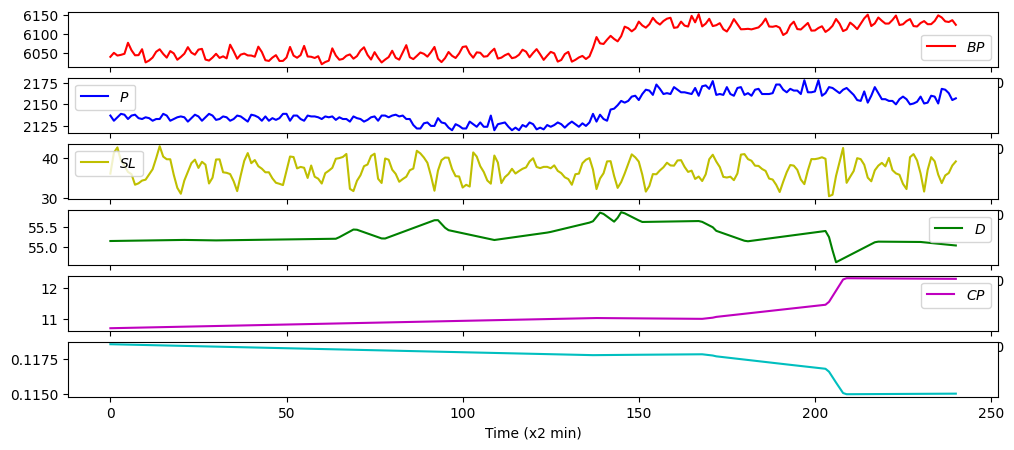

In [82]:
# DIY FULL ARX
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

MV = ['F', 'FW', 'MS', 'SW', 'PS']
CV = ['BP', 'P', 'SL', 'D', 'CP', 'D50']

na = 2 # Number of A coefficients
nb = 2 # Number of B coefficients
ny = 6 # Number of outputs
nu = 5 # Number of inputs


# A (na x ny)
# B (ny x (nb x nu))
# C (ny)
#p is above

# Create GEKKO model
sm = GEKKO(remote=False)

# Build GEKKO ARX model

sy = sm.Array(sm.CV,6)
su = sm.Array(sm.MV,5)

for i in range(len(sy)):
    sy[i].value=df[CV[i]].iloc[0]
#y[3].value=0.0 D

sy,su = sm.arx(P1,sy,su)

# # rename CVs
# TC1 = y[0]
# TC2 = y[1]

# # rename MVs
# Q1 = u[0]
# Q2 = u[1]


# load inputs
tf = 240 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()
u4 = u3.copy()
u5 = u4.copy()

# u1[:] = df_5[MV[0]].median()
# u2[:] = df_5[MV[1]].median()
# u3[:] = df_5[MV[2]].median()
# u4[:] = df_5[MV[3]].median()
# u5[:] = df_5[MV[4]].median()

u1[0:] = df[MV[0]].iloc[0:tf+1]
u2[0:] = df[MV[1]].iloc[0:tf+1]
u3[0:] = df[MV[2]].iloc[0:tf+1]
u4[0:] = df[MV[3]].iloc[0:tf+1]
u5[0:] = df[MV[4]].iloc[0:tf+1]

su[0].value = u1
su[1].value = u2
su[2].value = u3
su[3].value = u4
su[4].value = u5

# customize names
mv1 = su[0]; mv2 = su[1]; mv3 = su[2]; mv4 = su[3]; mv5 = su[4]
cv1 = sy[0]; cv2 = sy[1]; cv3 = sy[2]; cv4 = sy[3]; cv5 = sy[4]; cv6 = sy[5]


# options
sm.time = np.linspace(0,tf,tf+1)
sm.options.imode = 4; sm.options.nodes = 2

# simulate
sm.solve(disp=False)
#m.time=m.time[20:]
plt.figure(0,figsize=(12,4))
plt.subplot(5,1,1)
plt.plot(sm.time,mv1.value,'r-',label=r'$F$');plt.legend(loc='best')
plt.subplot(5,1,2)
plt.plot(sm.time,mv2.value,'b--',label=r'$FW$');plt.legend(loc='best')
plt.subplot(5,1,3)
plt.plot(sm.time,mv3.value,'y--',label=r'$MS$');plt.legend(loc='best')
plt.subplot(5,1,4)
plt.plot(sm.time,mv4.value,'g--',label=r'$SW$');plt.legend(loc='best')
plt.subplot(5,1,5)
plt.plot(sm.time,mv5.value,'m--',label=r'$PS$');plt.legend(loc='best')
plt.ylabel('MV')
plt.legend(loc='best')
plt.figure(1,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(sm.time,cv1.value,'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(sm.time,cv2.value,'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(sm.time,cv3.value,'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(sm.time,cv4.value,'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(sm.time,cv5.value,'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(sm.time,cv6.value,'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');
plt.legend(loc='best')
plt.show();
plt.figure(2,figsize=(12,5))
plt.subplot(6,1,1)
plt.plot(sm.time,df[CV[0]].iloc[:tf+1],'r-',label=r'$BP$');plt.legend(loc='best')
plt.subplot(6,1,2)
plt.plot(sm.time,df[CV[1]].iloc[:tf+1],'b-',label=r'$P$');plt.legend(loc='best')
plt.subplot(6,1,3)
plt.plot(sm.time,df[CV[2]].iloc[:tf+1],'y-',label=r'$SL$');plt.legend(loc='best')
plt.subplot(6,1,4)
plt.plot(sm.time,df[CV[3]].iloc[:tf+1],'g-',label=r'$D$');plt.legend(loc='best')
plt.subplot(6,1,5)
plt.plot(sm.time,df[CV[4]].iloc[:tf+1],'m-',label=r'$CP$');plt.legend(loc='best')
plt.subplot(6,1,6)
plt.plot(sm.time,df[CV[5]].iloc[:tf+1],'c-',label=r'$D50$'); plt.xlabel('Time (x2 min)');

#Comparison of ARX

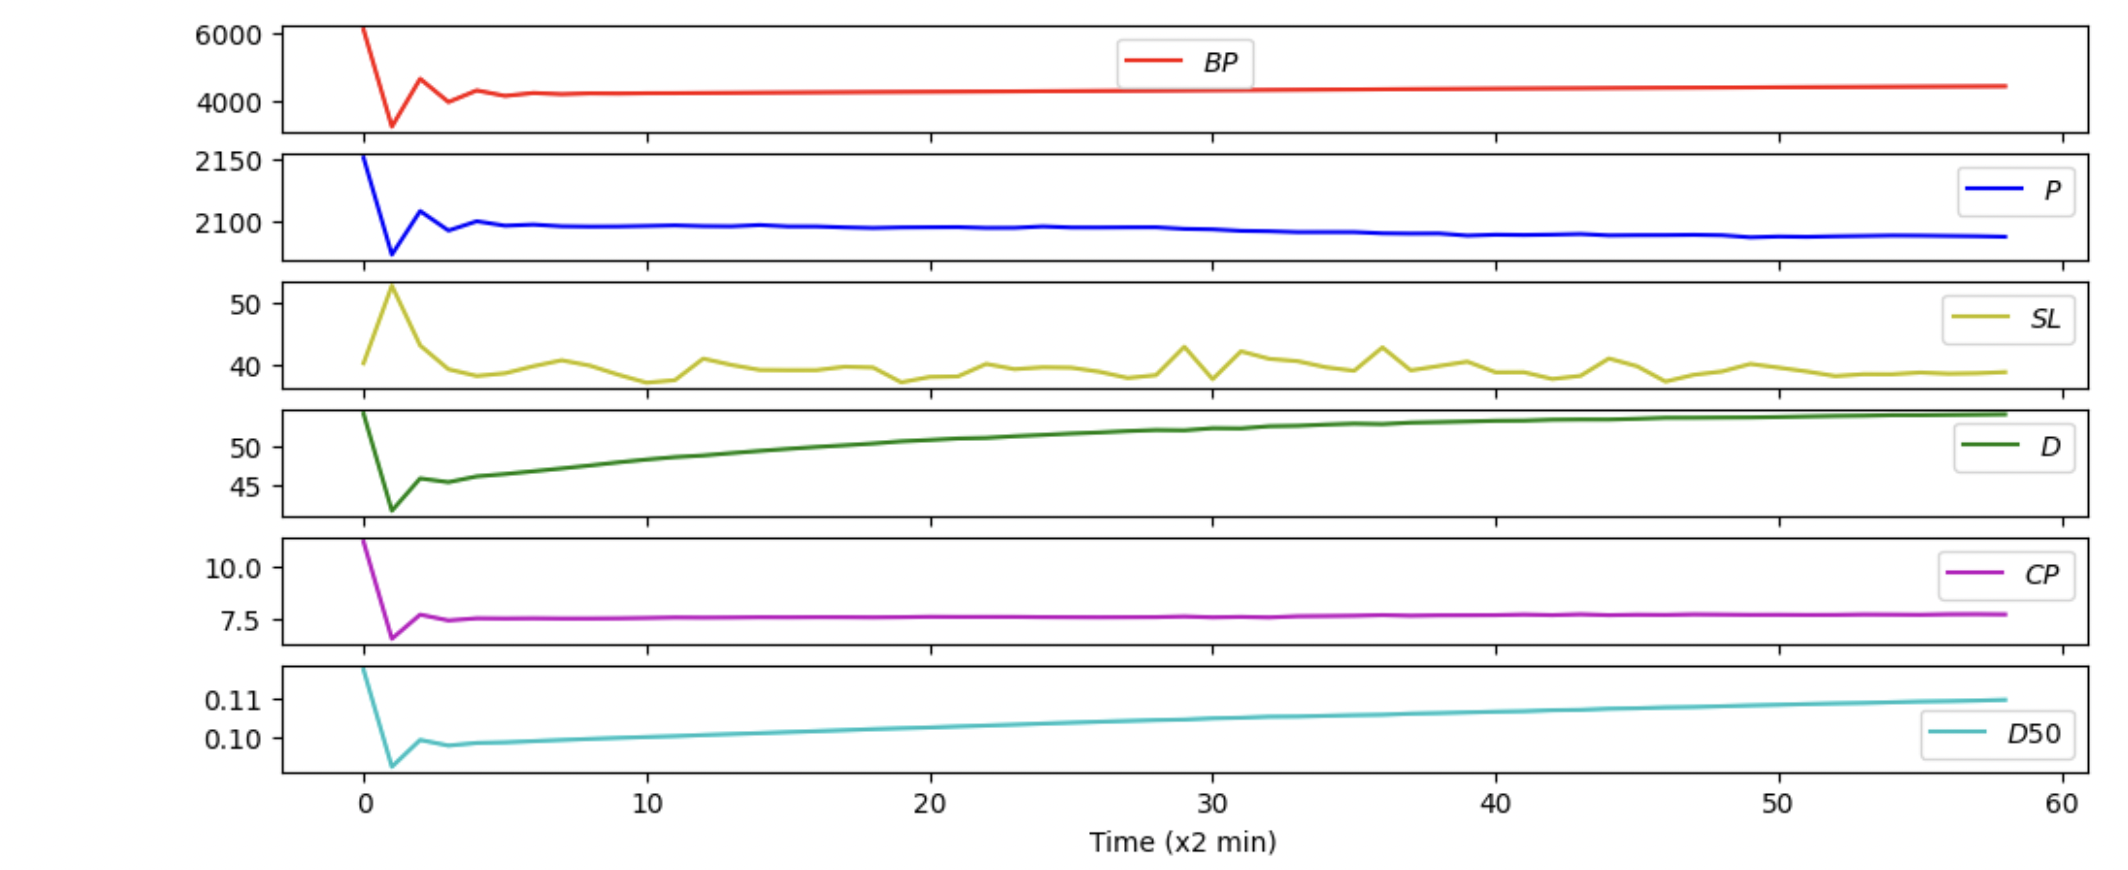
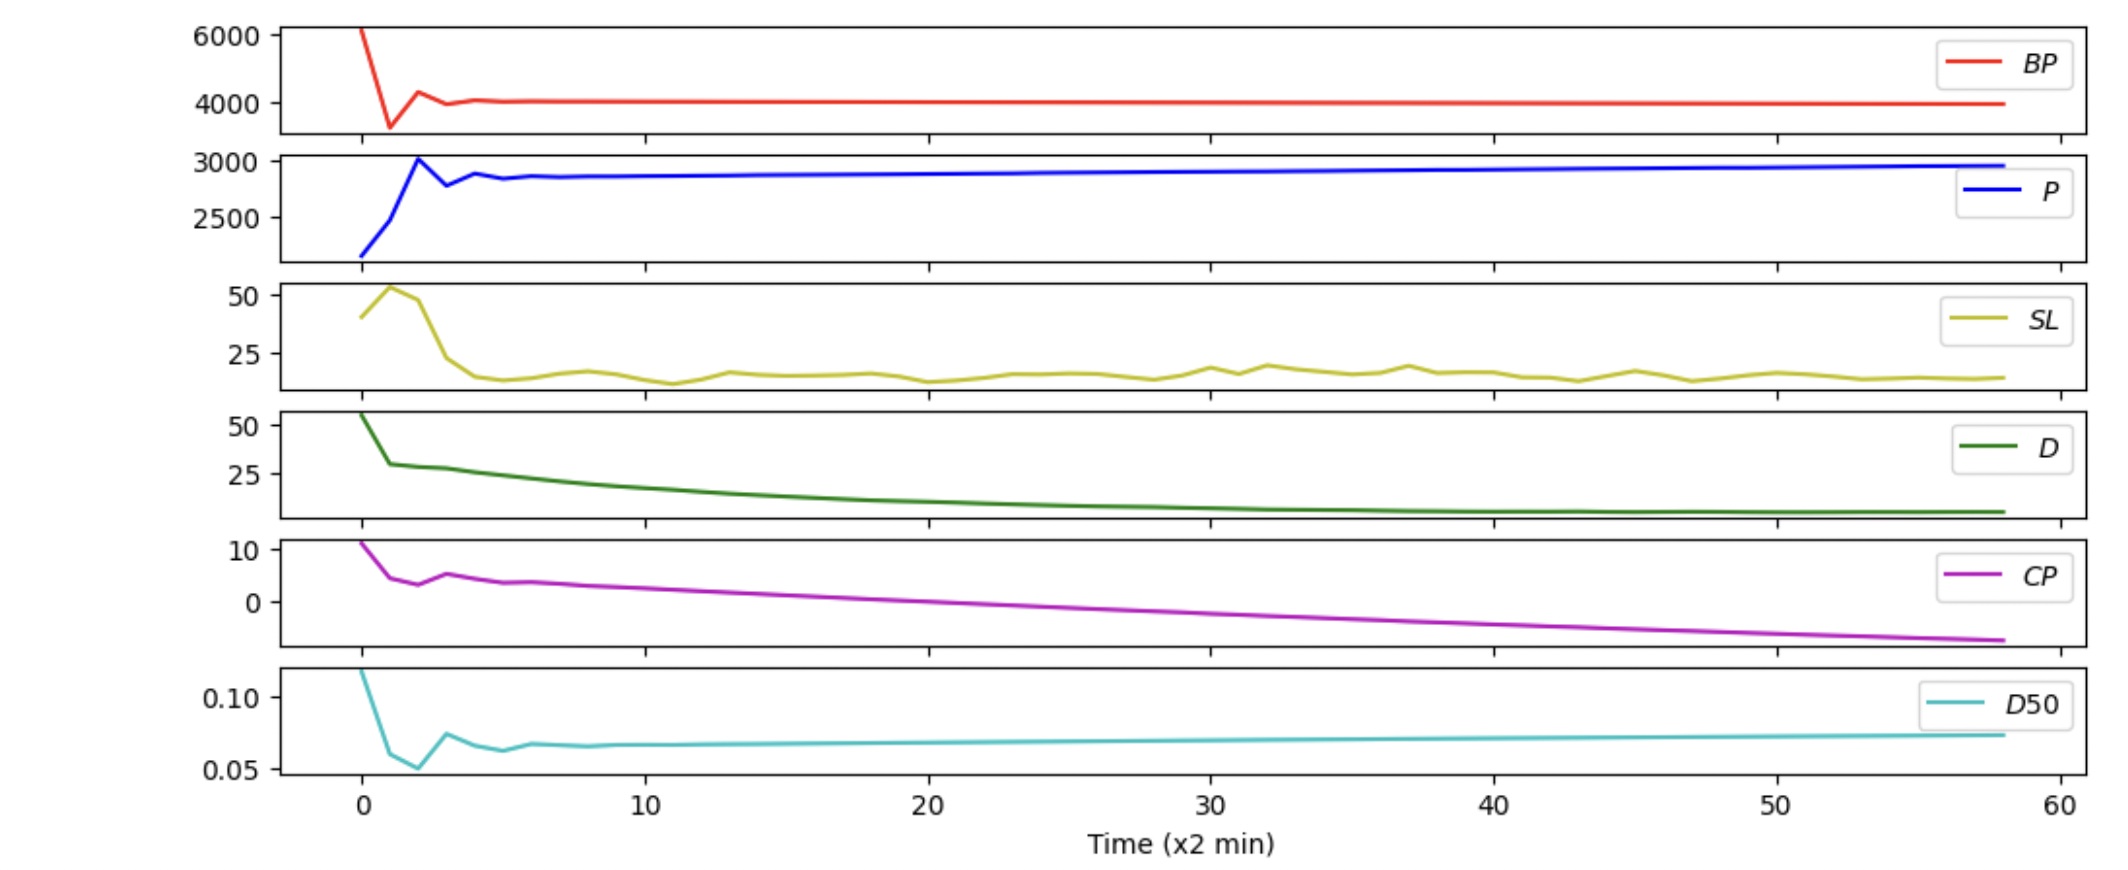

In [61]:
# for one variable onyl:
#p = {'a':A,'b':B,'c':C}
import pickle
with open('p_gek_P_only.pkl', 'rb') as file:           
    p = pickle.load(file)
    

In [64]:
# DIY ARX  create and plot for one variable
 
# Could try scaling differently so coefficients are reasonable
# Try different variable.

import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt
%matplotlib inline

na = 3 # Number of A coefficients
nb = 3 # Number of B coefficients
ny = 1 # Number of outputs
nu = 3 # Number of inputs

# A (na x ny)

#CV
cv= 'P'
#MVs
mv=['F','FW','MS']

#my own a and b array
# if na==2:
#     A=np.array([[models[cv].alpha[cv][0]],[models[cv].alpha[cv][1]]])
# elif na==1:
#     A=np.array([[models[cv].alpha[cv][0]]])
# else:
#     print('add row to A matrix')
# #A = np.array([models['P'].alpha['P']])   


# # B (ny x (nb x nu))
# B=np.array([])
# b1=models[cv].beta[mv[0]][0]
# b2=models[cv].beta[mv[1]][0]
# b3=models[cv].beta[mv[2]][0]
# b4=models[cv].beta[mv[0]][1]
# b5=models[cv].beta[mv[1]][1]
# b6=models[cv].beta[mv[2]][1]
# B=np.array([[[b1,b2,b3],[b4,b5,b6]]])

# # for i in range(nb):
# #     L=[]
# #     for j in range(nu):
# #         L+=models[cv].beta[mv[j]][1]
# #         print(L)
# #     np.append(B,L,axis=0)
# print(B)

#C = np.array([0.0])

# create parameter dictionary
#p = {'a':A,'b':B,'c':C}
#print(p)

# Create GEKKO model
m = GEKKO(remote=False)

y = m.Array(m.CV,1)
u = m.Array(m.MV,3)

y[0].value=df[cv].iloc[0]

y[0].lower=1000.0
#y[3].value=0.0 D



# Build GEKKO ARX model
y,u = m.arx(p,y,u)

# load inputs
tf = 120 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u3 = u2.copy()

# u1[30:60] = df_5[m1].median()
# u2[30:60] = df_5[m2].median()
# u3[30:60] = df_5[m3].median()

u1[-1] = df[mv[0]].iloc[tf]
u2[-1] = df[mv[1]].iloc[tf]
u3[-1] = df[mv[2]].iloc[tf]

u1[:-1] = df[mv[0]].iloc[:tf]
u2[:-1] = df[mv[1]].iloc[:tf]
u3[:-1] = df[mv[2]].iloc[:tf]

u[0].value = u1
u[1].value = u2
u[2].value = u3

# customize names
mv1 = u[0]; mv2 = u[1]; mv3 = u[2]
cv1 = y[0]; #cv2 = y[1]


# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4; m.options.nodes = 2

# simulate
m.solve(disp=False)


# plt.figure(figsize=(10,6))
# plt.subplot(2,1,1)
# plt.plot(m.time,mv1.value,'r-',label=r'$MV_1$')
# plt.plot(m.time,mv2.value,'b--',label=r'$MV_2$')
# plt.plot(m.time,mv3.value,'y--',label=r'$MV_3$')
plt.figure(0,figsize=(12,7))
plt.subplot(4,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$F$');plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(m.time,mv2.value,'b--',label=r'$FW$');plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(m.time,mv3.value,'y--',label=r'$MS$');plt.legend(loc='best')
plt.ylabel('MV')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(m.time,cv1.value,'r:',label=r'$CV_1$')
#plt.plot(m.time,cv2.value,'b.-',label=r'$CV_2$')
plt.ylabel('CV'); plt.xlabel('Time (x2 min)')
plt.legend(loc='best')
plt.show()

Exception: @error: Solution Not Found
